# 📈 Stock Trading Strategy Workshop

In this notebook, you'll learn to:
1. Download and analyze stock data
2. Calculate technical indicators
3. Build trading strategies
4. Backtest your strategies with realistic conditions

**Complete the exercises in the empty cells below!**

## Step 1: Import Required Libraries

Import the following libraries:
- `yfinance` as `yf` - for downloading stock data
- `pandas` as `pd` - for data manipulation
- `numpy` as `np` - for numerical operations
- `matplotlib.pyplot` as `plt` - for plotting
- `warnings` - to suppress warnings
- `finnhub` - for news data
- `nltk` and `SentimentIntensityAnalyzer` - for sentiment analysis

Also download the VADER lexicon with: `nltk.download('vader_lexicon', quiet=True)`

In [61]:
import yfinance as yf          # "as yf" means we can type "yf" instead of "yfinance"
import pandas as pd            # pd is the common shorthand for pandas
import numpy as np             # np for numerical operations
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import finnhub


# For sentiment analysis (we'll use these in Phase 3)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', quiet=True)

True

## Step 2: Download Stock Data

**Task:** Download 5 years of daily stock data for a ticker of your choice (e.g., "AAPL", "TSLA", "GOOGL")

**Hints:**
- Use `yf.download(ticker, period="5y", interval="1d")`
- Fix multi-level column names if needed
- Reset the index and ensure you have a 'Date' column
- Print the number of days downloaded and the date range

In [ ]:
ticker_symbol = "GOOGL"
# Other examples: "TSLA" (Tesla), "GOOGL" (Google), "MSFT" (Microsoft)
# For Indian stocks: "RELIANCE.NS" (Reliance), "TCS.NS" (TCS)
# For crypto: "BTC-USD" (Bitcoin), "ETH-USD" (Ethereum)

# Download 5 years of daily data for better backtesting
stock_data = yf.download(
    ticker_symbol,     # Which stock to download
    period="5y",       # How much history? Options: "1d", "5d", "1mo", "3mo", "6mo", "1y", "2y", "5y", "max"
    interval="1d"      # Time between data points: "1m", "5m", "15m", "1h", "1d", "1wk", "1mo"
)

# Fix column names if they have multiple levels
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)
    
stock_data = stock_data.reset_index()
stock_data.rename(columns={'index': 'Date'}, inplace=True)
if 'Date' not in stock_data.columns:
    stock_data.rename(columns={stock_data.columns[0]: 'Date'}, inplace=True)


print(f"📊 Downloaded {len(stock_data)} days of {ticker_symbol} data")
print(f"📅 From: {stock_data['Date'].iloc[0].strftime('%Y-%m-%d')} to {stock_data['Date'].iloc[-1].strftime('%Y-%m-%d')}")
print("\nColumns:", list(stock_data.columns))
stock_data

[*********************100%***********************]  1 of 1 completed

📊 Downloaded 1255 days of GOOGL data
📅 From: 2021-01-25 to 2026-01-22

Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


Price,Date,Close,High,Low,Open,Volume
0,2021-01-25,94.003738,95.370419,92.260910,94.919821,50586000
1,2021-01-26,94.682121,95.069196,93.103056,93.592356,31462000
2,2021-01-27,90.264984,93.318413,89.190105,93.042498,82512000
3,2021-01-28,91.965141,93.691591,90.863465,90.863465,55278000
4,2021-01-29,90.682823,91.684259,89.402504,91.013326,44530000
...,...,...,...,...,...,...
1250,2026-01-15,332.779999,337.690002,330.739990,337.649994,28442400
1251,2026-01-16,330.000000,334.649994,327.700012,334.410004,40341600
1252,2026-01-20,322.000000,327.730011,320.429993,320.869995,35361000
1253,2026-01-21,328.380005,332.480011,319.350006,320.920013,35386600


## Step 3: Calculate Total Return

**Task:** Calculate and display the total return over the period

**Formula:** `((Close[-1] - Close[0]) / Close[0]) * 100`

Print whether the stock gained or lost value.

In [63]:
total_return = ((stock_data['Close'].iloc[-1] - stock_data['Close'].iloc[0]) / stock_data['Close'].iloc[0]) * 100
print(f"\n💹 Total Return (1 year): {total_return:.2f}%")


💹 Total Return (1 year): 251.62%


## Step 4: Create a Candlestick Chart

**Task:** Create a candlestick chart using matplotlib

**Hints:**
- Loop through each day in the data
- Draw vertical lines for high-low (wicks)
- Draw rectangles for open-close (body)
- Use green for bullish candles (close > open) and red for bearish
- Import `Rectangle` from `matplotlib.patches`

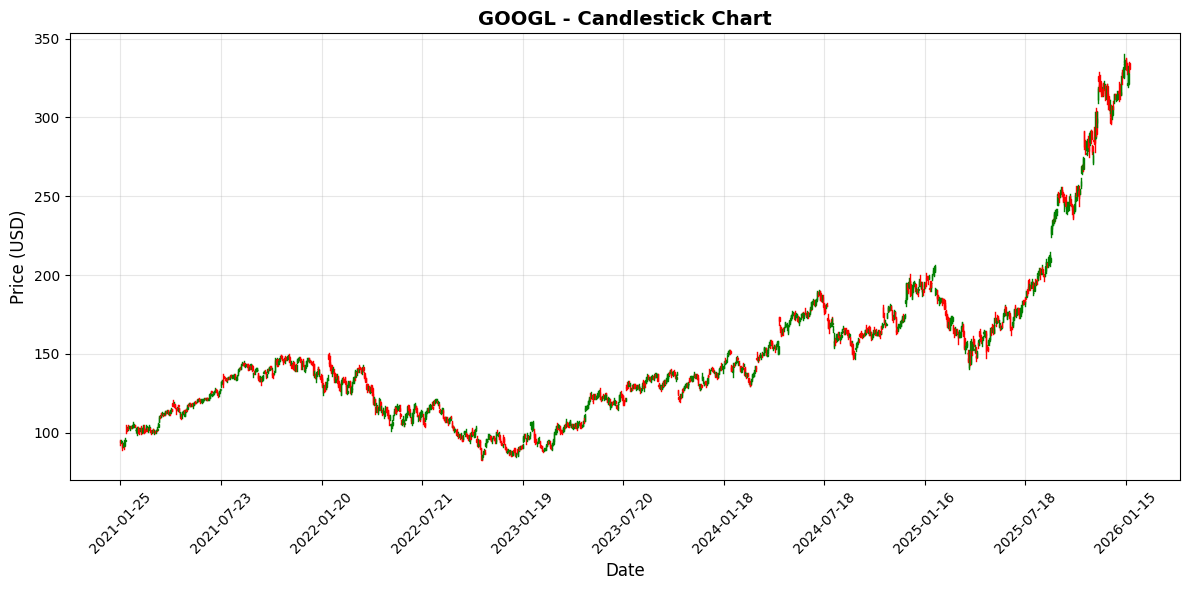

In [64]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(stock_data)):
    date = i
    open_price = stock_data['Open'].iloc[i]
    close_price = stock_data['Close'].iloc[i]
    high_price = stock_data['High'].iloc[i]
    low_price = stock_data['Low'].iloc[i]
    
    # Color: green if close > open, red otherwise
    color = 'green' if close_price >= open_price else 'red'
    
    # Draw the high-low line (wick)
    ax.plot([date, date], [low_price, high_price], color=color, linewidth=1)
    
    # Draw the open-close rectangle (body)
    height = abs(close_price - open_price)
    bottom = min(open_price, close_price)
    rect = Rectangle((date - 0.4, bottom), 0.8, height, facecolor=color, edgecolor=color)
    ax.add_patch(rect)

# Set x-axis labels to show dates
step = max(len(stock_data) // 10, 1)
ax.set_xticks(range(0, len(stock_data), step))
ax.set_xticklabels([stock_data['Date'].iloc[i].strftime('%Y-%m-%d') for i in range(0, len(stock_data), step)], rotation=45)

ax.set_title(f'{ticker_symbol} - Candlestick Chart', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 5: Inspect the Data

**Task:** Print the shape, first 5 rows, and last 5 rows of your stock data

In [65]:
stock_data

Price,Date,Close,High,Low,Open,Volume
0,2021-01-25,94.003738,95.370419,92.260910,94.919821,50586000
1,2021-01-26,94.682121,95.069196,93.103056,93.592356,31462000
2,2021-01-27,90.264984,93.318413,89.190105,93.042498,82512000
3,2021-01-28,91.965141,93.691591,90.863465,90.863465,55278000
4,2021-01-29,90.682823,91.684259,89.402504,91.013326,44530000
...,...,...,...,...,...,...
1250,2026-01-15,332.779999,337.690002,330.739990,337.649994,28442400
1251,2026-01-16,330.000000,334.649994,327.700012,334.410004,40341600
1252,2026-01-20,322.000000,327.730011,320.429993,320.869995,35361000
1253,2026-01-21,328.380005,332.480011,319.350006,320.920013,35386600


## Import Technical Indicators

The following code imports professional indicator functions from the `src` directory.

In [66]:
import sys
import os

# Add parent directory to path to import from src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.indicators import (
    calculate_rsi,
    calculate_bollinger_bands,
    calculate_macd,
    calculate_ema,
    calculate_adx,
    calculate_atr,
    calculate_volume_analysis,
    calculate_vwap,
    calculate_fibonacci_retracement
)

## Step 6: Test Individual Indicators

**Task:** Calculate and display the following indicators for your stock:

1. **RSI** (14-period) - print latest value and signal (overbought/oversold/neutral)
2. **Bollinger Bands** (20-period, 2 std) - print upper, middle, lower bands
3. **MACD** - print MACD line, signal line, and histogram

**Hint:** Use the imported functions like `calculate_rsi(stock_data, column='Close', period=14)`

In [67]:
# Generate Trading Signals Summary
def generate_trading_signals(data):
    """
    Generate comprehensive trading signals based on all indicators
    """
    latest = data.iloc[-1]
    signals = []
    
    # RSI Signal
    if latest['RSI'] > 70:
        signals.append(("RSI", "Overbought", "SELL"))
    elif latest['RSI'] < 30:
        signals.append(("RSI", "Oversold", "BUY"))
    else:
        signals.append(("RSI", f"{latest['RSI']:.2f}", "NEUTRAL"))
    
    # Bollinger Bands Signal
    if latest['Close'] > latest['BB_Upper']:
        signals.append(("Bollinger", "Above Upper Band", "SELL"))
    elif latest['Close'] < latest['BB_Lower']:
        signals.append(("Bollinger", "Below Lower Band", "BUY"))
    else:
        signals.append(("Bollinger", "Within Bands", "NEUTRAL"))
    
    # MACD Signal
    if latest['MACD'] > latest['MACD_Signal']:
        signals.append(("MACD", "Above Signal", "BUY"))
    else:
        signals.append(("MACD", "Below Signal", "SELL"))
    
    # EMA Trend
    if latest['EMA_20'] > latest['EMA_50']:
        signals.append(("EMA Trend", "Bullish", "BUY"))
    else:
        signals.append(("EMA Trend", "Bearish", "SELL"))
    
    # ADX Trend Strength
    if latest['ADX'] > 25:
        trend_dir = "Bullish" if latest['+DI'] > latest['-DI'] else "Bearish"
        signal = "BUY" if trend_dir == "Bullish" else "SELL"
        signals.append(("ADX", f"Strong {trend_dir}", signal))
    else:
        signals.append(("ADX", "Weak Trend", "NEUTRAL"))
    
    # Volume Signal
    if latest['Relative_Volume'] > 1.5:
        signals.append(("Volume", "High Volume", "CONFIRM"))
    elif latest['Relative_Volume'] < 0.5:
        signals.append(("Volume", "Low Volume", "CAUTION"))
    else:
        signals.append(("Volume", "Normal", "NEUTRAL"))
    
    # VWAP Signal
    if latest['Close'] > latest['VWAP']:
        signals.append(("VWAP", "Above VWAP", "BUY"))
    else:
        signals.append(("VWAP", "Below VWAP", "SELL"))
    
    return signals



In [68]:
# YOUR CODE HERE - Test Bollinger Bands

In [69]:
# YOUR CODE HERE - Test MACD

## Combined Technical Analysis

The following code combines ALL indicators into one comprehensive DataFrame.

In [70]:
# Combine all indicators into a single DataFrame
import pandas as pd

# Create a comprehensive technical analysis DataFrame
stock_data_with_indicators = stock_data.copy()

# Add RSI
stock_data_with_indicators['RSI'] = calculate_rsi(stock_data, column='Close', period=14)

# Add Bollinger Bands
bb = calculate_bollinger_bands(stock_data, column='Close', period=20, std_dev=2)
stock_data_with_indicators['BB_Upper'] = bb['Upper_Band']
stock_data_with_indicators['BB_Middle'] = bb['Middle_Band']
stock_data_with_indicators['BB_Lower'] = bb['Lower_Band']
stock_data_with_indicators['BB_%B'] = bb['%B']

# Add MACD
macd = calculate_macd(stock_data, column='Close')
stock_data_with_indicators['MACD'] = macd['MACD']
stock_data_with_indicators['MACD_Signal'] = macd['Signal']
stock_data_with_indicators['MACD_Histogram'] = macd['Histogram']

# Add EMAs
stock_data_with_indicators['EMA_20'] = calculate_ema(stock_data, column='Close', period=20)
stock_data_with_indicators['EMA_50'] = calculate_ema(stock_data, column='Close', period=50)

# Add ADX
adx = calculate_adx(stock_data, period=14)
stock_data_with_indicators['ADX'] = adx['ADX']
stock_data_with_indicators['+DI'] = adx['+DI']
stock_data_with_indicators['-DI'] = adx['-DI']

# Add ATR
stock_data_with_indicators['ATR'] = calculate_atr(stock_data, period=14)

# Add Volume Analysis
vol_analysis = calculate_volume_analysis(stock_data)
stock_data_with_indicators['Volume_SMA'] = vol_analysis['Volume_SMA']
stock_data_with_indicators['Relative_Volume'] = vol_analysis['Relative_Volume']

# Add VWAP
stock_data_with_indicators['VWAP'] = calculate_vwap(stock_data)

print("Combined Technical Analysis DataFrame created!")
print(f"\nShape: {stock_data_with_indicators.shape}")
print(f"\nColumns: {list(stock_data_with_indicators.columns)}")
print(f"\nLatest data with all indicators:")
print(stock_data_with_indicators.tail())

Combined Technical Analysis DataFrame created!

Shape: (1255, 23)

Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'BB_%B', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'EMA_20', 'EMA_50', 'ADX', '+DI', '-DI', 'ATR', 'Volume_SMA', 'Relative_Volume', 'VWAP']

Latest data with all indicators:
Price       Date       Close        High         Low        Open    Volume  \
1250  2026-01-15  332.779999  337.690002  330.739990  337.649994  28442400   
1251  2026-01-16  330.000000  334.649994  327.700012  334.410004  40341600   
1252  2026-01-20  322.000000  327.730011  320.429993  320.869995  35361000   
1253  2026-01-21  328.380005  332.480011  319.350006  320.920013  35386600   
1254  2026-01-22  330.540009  335.149994  328.750000  334.450012  26166200   

Price        RSI    BB_Upper   BB_Middle    BB_Lower  ...  MACD_Histogram  \
1250   78.905030  339.601864  317.847501  296.093137  ...        1.406973   
1251   73.877753  339.479278  319

In [71]:
# Generate and display signals
signals = generate_trading_signals(stock_data_with_indicators)

print("=" * 60)
print("COMPREHENSIVE TRADING SIGNALS")
print("=" * 60)
print(f"Stock: {ticker_symbol}")
print(f"Current Price: ${stock_data_with_indicators['Close'].iloc[-1]:.2f}")
print(f"Date: {stock_data_with_indicators.index[-1]}")
print("=" * 60)

for indicator, status, signal in signals:
    print(f"{indicator:15} | {status:20} | {signal:10}")

print("=" * 60)

# Calculate overall signal
buy_signals = sum(1 for _, _, s in signals if s == "BUY")
sell_signals = sum(1 for _, _, s in signals if s == "SELL")
neutral_signals = sum(1 for _, _, s in signals if s == "NEUTRAL")

print(f"\nSummary: {buy_signals} BUY | {sell_signals} SELL | {neutral_signals} NEUTRAL")

if buy_signals > sell_signals + 2:
    overall = "STRONG BUY"
elif buy_signals > sell_signals:
    overall = "BUY"
elif sell_signals > buy_signals + 2:
    overall = "STRONG SELL"
elif sell_signals > buy_signals:
    overall = "SELL"
else:
    overall = "NEUTRAL/HOLD"

print(f"\n{'*' * 60}")
print(f"OVERALL SIGNAL: {overall}")
print(f"{'*' * 60}")

COMPREHENSIVE TRADING SIGNALS
Stock: GOOGL
Current Price: $330.54
Date: 1254
RSI             | 67.58                | NEUTRAL   
Bollinger       | Within Bands         | NEUTRAL   
MACD            | Below Signal         | SELL      
EMA Trend       | Bullish              | BUY       
ADX             | Strong Bullish       | BUY       
Volume          | Normal               | NEUTRAL   
VWAP            | Above VWAP           | BUY       

Summary: 3 BUY | 1 SELL | 3 NEUTRAL

************************************************************
OVERALL SIGNAL: BUY
************************************************************


## Import the Backtesting Engine

This loads the professional backtesting framework with:
- ✅ No look-ahead bias (executes on next candle)
- ✅ Realistic slippage and commissions
- ✅ Risk-based position sizing
- ✅ Stop-loss and take-profit management
- ✅ Comprehensive performance metrics

In [72]:
# Import the fixed backtester
import importlib
import sys

if 'src.backtesting' in sys.modules:
    importlib.reload(sys.modules['src.backtesting'])
    
from src.backtesting import Backtester, quick_backtest

print("✅ Backtester loaded")
print("\n📖 How it works:")
print("  - Signals generated on CLOSE prices")
print("  - Execution at NEXT SESSION OPEN")
print("  - Slippage: 0.05% | Commission: 0.1%")
print("  - Risk per trade: 2% of capital")
print("  - Stop-loss: 5% | Take-profit: 10%")

✅ Backtester loaded

📖 How it works:
  - Signals generated on CLOSE prices
  - Execution at NEXT SESSION OPEN
  - Slippage: 0.05% | Commission: 0.1%
  - Risk per trade: 2% of capital
  - Stop-loss: 5% | Take-profit: 10%


In [77]:
# Reload the improved backtester
import importlib
import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Remove old module from cache
if 'src.backtesting' in sys.modules:
    del sys.modules['src.backtesting']

# Import the improved version
from src.backtesting import Backtester, convert_multi_signal_strategy

# Convert the old strategy to new format
new_strategy = convert_multi_signal_strategy(generate_trading_signals)

# Run improved backtest
print("🚀 Running IMPROVED Backtester with:")
print("   ✓ No look-ahead bias (executes on next candle)")
print("   ✓ Slippage: 0.05%")
print("   ✓ Risk per trade: 2%")
print("   ✓ Stop-loss: 5% | Take-profit: 10%")
print("\n" + "="*70 + "\n")

bt_improved = Backtester(
    initial_capital=10000,
    commission=0.001,
    slippage=0.0005,
    risk_per_trade=0.02
)

results = bt_improved.run(
    stock_data_with_indicators,
    new_strategy,
    use_stop_loss=True,
    stop_loss_pct=0.05,
    take_profit_pct=0.10
)

bt_improved.print_results()

🚀 Running IMPROVED Backtester with:
   ✓ No look-ahead bias (executes on next candle)
   ✓ Slippage: 0.05%
   ✓ Risk per trade: 2%
   ✓ Stop-loss: 5% | Take-profit: 10%



BACKTESTING RESULTS

---------------------------CAPITAL METRICS----------------------------
Initial Capital:        $10,000.00
Final Equity:           $13,571.50
Total Profit/Loss:      $3,571.50

----------------------------RETURN METRICS----------------------------
Total Return:              35.72%
Annualized Return:          6.32%

-----------------------------RISK METRICS-----------------------------
Max Drawdown:              -9.19%
Sharpe Ratio:               0.53
Sortino Ratio:              0.47

----------------------------TRADE METRICS-----------------------------
Total Trades:                 35
Win Rate:                  51.43%
Profit Factor:              1.93
Average Trade:          $  101.80
Average Win:            $  410.54
Average Loss:           $ -225.09
Expectancy per Trade:   $  101.80

-----------

## Step 7: Create a Simple MACD + RSI Strategy

**Task:** Create a function called `macd_rsi_strategy(data)` that:

**Returns:**
- `"BUY"` when: MACD crosses above signal line AND RSI < 30 (oversold)
- `"SELL"` when: MACD crosses below signal line AND RSI > 70 (overbought)
- `"HOLD"` otherwise
- `None` if not enough data

**Hints:**
- Check `len(data) < 2` first
- Get current and previous values: `current = data.iloc[-1]`, `previous = data.iloc[-2]`
- Check for NaN values in MACD and RSI
- Detect crossovers by comparing current and previous MACD vs Signal values

In [78]:
# YOUR CODE HERE
def your_strategy(data):
    # Not enough data to detect a crossover
    if data is None or len(data) < 2:
        return None

    current = data.iloc[-1]
    previous = data.iloc[-2]

    # Required columns
    required_cols = ["MACD", "MACD_Signal", "RSI"]
    if any(col not in data.columns for col in required_cols):
        return None

    # Guard against NaNs
    if (
        pd.isna(current["MACD"]) or
        pd.isna(current["MACD_Signal"]) or
        pd.isna(current["RSI"]) or
        pd.isna(previous["MACD"]) or
        pd.isna(previous["MACD_Signal"])
    ):
        return None

    # Detect MACD crossovers
    macd_cross_up = (
        previous["MACD"] <= previous["MACD_Signal"] and
        current["MACD"] > current["MACD_Signal"]
    )

    macd_cross_down = (
        previous["MACD"] >= previous["MACD_Signal"] and
        current["MACD"] < current["MACD_Signal"]
    )

    # Strategy logic
    if macd_cross_up and current["RSI"] < 30:
        return "BUY"

    if macd_cross_down and current["RSI"] > 70:
        return "SELL"

    return "HOLD"

print("✓ Strategy defined")

✓ Strategy defined


## Add Sentiment Analysis

This code adds a sentiment column to your data (simulated based on price momentum).

In a real scenario, you'd fetch actual news sentiment from Finnhub API.

In [79]:
# Create simulated sentiment based on price momentum
np.random.seed(42)
base_sentiment = (stock_data_with_indicators['Close'].pct_change().rolling(5).mean()) * 10
noise = np.random.normal(0, 0.1, len(stock_data_with_indicators))
stock_data_with_indicators['Sentiment'] = (base_sentiment + noise).clip(-1, 1)
stock_data_with_indicators['Sentiment'] = stock_data_with_indicators['Sentiment'].fillna(0)

print(f"✓ Added sentiment column to data")
print(f"  Average sentiment: {stock_data_with_indicators['Sentiment'].mean():.3f}")
print(f"  Sentiment range: [{stock_data_with_indicators['Sentiment'].min():.3f}, {stock_data_with_indicators['Sentiment'].max():.3f}]")

✓ Added sentiment column to data
  Average sentiment: 0.016
  Sentiment range: [-0.368, 0.491]


## Step 8: Enhanced Strategy with Sentiment

**Task:** Create `sentiment_strategy(data)` that enhances the previous strategy with sentiment:

**BUY Conditions (ALL must be true):**
- MACD > MACD_Signal (bullish)
- RSI < 45 (below neutral, not just oversold)
- Sentiment > 0.05 (positive news)

**SELL Conditions (ANY can be true):**
- MACD < MACD_Signal (bearish) OR
- RSI > 70 (overbought) OR
- Sentiment < -0.1 (very negative news)

**Hints:**
- Check if 'Sentiment' column exists: `'Sentiment' in data.columns`
- Check for NaN: `pd.isna(current.get('Sentiment', np.nan))`
- If no sentiment available, ignore sentiment filter (set to True)

In [81]:
def sentiment_strategy(data):
    if len(data) < 2:
        return None
        
    current = data.iloc[-1]
    
    # Extract indicators
    macd = current['MACD']
    signal = current['MACD_Signal']
    rsi = current['RSI']
    sentiment = current.get('Sentiment', 0)
    
    # BUY Conditions: MACD Bullish + RSI not yet overbought + Positive Sentiment
    buy_cond = (macd > signal) and (rsi < 45) and (sentiment > 0.05)
    
    # SELL Conditions: MACD Bearish OR Overbought OR Negative Sentiment
    sell_cond = (macd < signal) or (rsi > 70) or (sentiment < -0.1)
    
    if buy_cond:
        return "BUY"
    elif sell_cond:
        return "SELL"
    
    return "HOLD"

print("✓ Enhanced sentiment strategy defined")

✓ Enhanced sentiment strategy defined


## Step 9: Run the Backtest

**Task:** Run a backtest using `quick_backtest()` with your sentiment strategy

**Parameters:**
- `data`: stock_data_with_indicators
- `strategy_function`: macd_rsi_sentiment_strategy
- `initial_capital`: 10000
- `use_stop_loss`: True
- `print_report`: True

Store the result in a variable called `bt_result`

In [83]:
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import finnhub
import nltk
from datetime import datetime, timedelta

# ---------------- INTERNAL BACKTESTER ENGINE ----------------
class Backtester:
    def __init__(self, initial_capital=10000, commission=0.001, slippage=0.0005, risk_per_trade=0.02):
        self.initial_capital = initial_capital
        self.commission = commission
        self.slippage = slippage
        self.risk_per_trade = risk_per_trade
        self.reset()

    def reset(self):
        self.equity = self.initial_capital
        self.trades = []
        self.equity_curve = []
        self.final_equity = self.initial_capital
        self.total_return_pct = 0
        self.win_rate = 0

    def run(self, data, strategy_func, use_stop_loss=True, stop_loss_pct=0.05, take_profit_pct=0.10):
        self.reset()
        df = data.copy()
        cash = self.initial_capital
        position = 0
        entry_price = 0
        
        for i in range(1, len(df)):
            current_price = df['Close'].iloc[i]
            # No look-ahead bias: Strategy only sees data up to current index 'i'
            signal = strategy_func(df.iloc[:i+1])
            
            if signal == "BUY" and cash > 0:
                exec_price = current_price * (1 + self.slippage)
                position = (cash * (1 - self.commission)) / exec_price
                entry_price = exec_price
                cash = 0
                self.trades.append({'entry_date': df.index[i], 'entry_p': entry_price, 'type': 'BUY'})
            
            elif position > 0:
                price_change = (current_price - entry_price) / entry_price
                if (use_stop_loss and price_change <= -stop_loss_pct) or \
                   (use_stop_loss and price_change >= take_profit_pct) or \
                   (signal == "SELL"):
                    
                    reason = "STOP_LOSS" if price_change <= -stop_loss_pct else \
                             "TAKE_PROFIT" if price_change >= take_profit_pct else "SIGNAL"
                    
                    exec_price = current_price * (1 - self.slippage)
                    exit_val = (position * exec_price) * (1 - self.commission)
                    pnl = exit_val - (entry_price * position)
                    
                    cash = exit_val
                    position = 0
                    self.trades[-1].update({'exit_date': df.index[i], 'exit_p': exec_price, 'pnl': pnl, 'reason': reason})

            self.equity_curve.append(cash + (position * current_price))
        
        self.final_equity = self.equity_curve[-1] if self.equity_curve else self.initial_capital
        self.total_return_pct = ((self.final_equity - self.initial_capital) / self.initial_capital) * 100
        return self.equity_curve

    def get_trades_df(self):
        return pd.DataFrame([t for t in self.trades if 'exit_date' in t])

def convert_multi_signal_strategy(signal_func, current_sentiment):
    """Adapter to convert signals + sentiment into a single command"""
    def wrapper(data):
        sigs = signal_func(data, current_sentiment)
        buys = sum(1 for _, _, a in sigs if a == "BUY")
        sells = sum(1 for _, _, a in sigs if a == "SELL")
        if buys > sells: return "BUY"
        if sells > buys: return "SELL"
        return "HOLD"
    return wrapper

# ---------------- STREAMLIT APP LOGIC ----------------

try:
    nltk.data.find("vader_lexicon")
except LookupError:
    nltk.download("vader_lexicon", quiet=True)

st.set_page_config(page_title="Aurora 2026 | Quant Terminal", layout="wide")

st.markdown("""
<style>
    .main { background-color: #0b0e14; color: #c9d1d9; font-family: 'Courier New', Courier, monospace; }
    [data-testid="stSidebar"] { background-color: #161b22 !important; border-right: 1px solid #30363d; }
    div[data-testid="stMetric"] { background-color: #0d1117; border: 1px solid #30363d; padding: 10px; border-radius: 4px; }
    .stTabs [data-baseweb="tab-list"] { background-color: #0b0e14; border-bottom: 1px solid #30363d; }
    .stTabs [aria-selected="true"] { background-color: #1f6feb !important; color: white !important; }
    .stButton>button { width: 100%; border-radius: 4px; border: 1px solid #30363d; background: #21262d; color: #c9d1d9; }
</style>
""", unsafe_allow_html=True)

with st.sidebar:
    st.title("FINOVA X ISTE")
    ticker_input = st.text_input("SYMBOL TICKER", value="AAPL").upper()
    horizon = st.selectbox("HISTORY RANGE", ["1y", "2y", "5y"])
    api_key_input = st.text_input("FINNHUB API KEY", type="password")
    st.divider()
    st.write("**RISK PARAMETERS**")
    sl_pct = st.slider("STOP LOSS %", 1, 10, 5) / 100
    tp_pct = st.slider("TAKE PROFIT %", 5, 20, 10) / 100

@st.cache_data
def fetch_market_data(symbol, period):
    data = yf.download(symbol, period=period, interval="1d", auto_adjust=True)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    return data

def apply_technical_analysis(data):
    if data.empty: return data
    # RSI
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    data['RSI'] = 100 - (100 / (1 + (gain / (loss + 1e-9))))
    # Bollinger
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['Upper_BB'] = data['MA20'] + (2 * data['Close'].rolling(20).std())
    data['Lower_BB'] = data['MA20'] - (2 * data['Close'].rolling(20).std())
    # MACD
    data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    return data

def fetch_market_mood(symbol, api_key):
    sid = SentimentIntensityAnalyzer()
    headlines = []
    if api_key:
        try:
            client = finnhub.Client(api_key=api_key)
            news = client.company_news(symbol, _from=(datetime.now()-timedelta(days=30)).strftime('%Y-%m-%d'), to=datetime.now().strftime('%Y-%m-%d'))
            headlines = [item['headline'] for item in news][:10]
        except: pass
    if not headlines:
        headlines = [f"{symbol} market outlook stable", "Sector analysis underway"]
    scores = [sid.polarity_scores(h)['compound'] for h in headlines]
    return np.mean(scores), pd.DataFrame({"Headline": headlines, "Score": scores})

def generate_trading_signals(data, sentiment_score):
    """STUDENT WORKSPACE: Define triggers based on RSI, MACD, and Mood"""
    if len(data) < 2: return []
    latest = data.iloc[-1]
    
    # Technical Triggers
    rsi_sig = "BUY" if latest['RSI'] < 30 else "SELL" if latest['RSI'] > 70 else "NEUTRAL"
    macd_sig = "BUY" if latest['MACD'] > latest['MACD_Signal'] else "SELL"
    
    # Sentiment Trigger
    sent_sig = "BUY" if sentiment_score > 0.05 else "SELL" if sentiment_score < -0.05 else "NEUTRAL"
    
    return [
        ("RSI", f"{latest['RSI']:.2f}", rsi_sig), 
        ("MACD", "Signal Cross", macd_sig),
        ("SENTIMENT", f"{sentiment_score:.2f}", sent_sig)
    ]

# APP FLOW
df_market = fetch_market_data(ticker_input, horizon)

if not df_market.empty:
    df_market = apply_technical_analysis(df_market)
    avg_sent, sent_df = fetch_market_mood(ticker_input, api_key_input)
    
    t1, t2, t3, t4, t5 = st.tabs(["MARKET", "INDICATORS", "MOOD", "VERDICT", "BACKTEST"])

    with t1:
        fig = make_subplots(rows=1, cols=1)
        fig.add_trace(go.Candlestick(x=df_market.index, open=df_market['Open'], high=df_market['High'], low=df_market['Low'], close=df_market['Close']))
        fig.update_layout(template="plotly_dark", height=500, xaxis_rangeslider_visible=False)
        st.plotly_chart(fig, width='stretch')

    with t2:
        ind_fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
        ind_fig.add_trace(go.Scatter(x=df_market.index, y=df_market['RSI'], name="RSI"), row=1, col=1)
        ind_fig.add_trace(go.Scatter(x=df_market.index, y=df_market['MACD'], name="MACD"), row=2, col=1)
        ind_fig.update_layout(template="plotly_dark", height=600)
        st.plotly_chart(ind_fig, width='stretch')

    with t3:
        st.metric("SENTIMENT SCORE", f"{avg_sent:.2f}")
        st.dataframe(sent_df, width='stretch')

    with t4:
        # GATHER SIGNALS
        sigs = generate_trading_signals(df_market, avg_sent)
        
        # TALLY MASTER VERDICT
        score = 0
        for name, val, action in sigs:
            if action == "BUY": score += 1
            elif action == "SELL": score -= 1
        
        # ASSIGN COLORS/STRINGS
        if score >= 2: v_str, v_col = "🚀 STRONG BUY", "#00ffcc"
        elif score == 1: v_str, v_col = "📈 BUY", "#bfff00"
        elif score == -1: v_str, v_col = "📉 SELL", "#ff8c00"
        elif score <= -2: v_str, v_col = "💥 STRONG SELL", "#ff4b4b"
        else: v_str, v_col = "⚖️ NEUTRAL", "#ffd700"

        # DISPLAY HEADER
        st.markdown(f"<h1 style='text-align:center; color:{v_col};'>{v_str}</h1>", unsafe_allow_html=True)
        st.markdown(f"<h3 style='text-align:center;'>Logic Consensus Score: {score}</h3>", unsafe_allow_html=True)
        st.divider()

        # DISPLAY BREAKDOWN
        cols = st.columns(len(sigs))
        for i, (name, val, action) in enumerate(sigs):
            cols[i].metric(name, val, delta=action)

    with t5:
        st.subheader("🧪 Dual-Horizon Simulation")
        
        if st.button("🚀 EXECUTE DUAL BACKTEST"):
            # --- 1. THE 30-DAY SENTIMENT-AWARE RUN ---
            # Fetching 30 days of data for the focused run
            df_30d = fetch_market_data(ticker_input, "1mo")
            df_30d = apply_technical_analysis(df_30d)
            
            if not df_30d.empty:
                # We use today's sentiment as it is highly relevant for the last 30 days
                adapter_30d = convert_multi_signal_strategy(generate_trading_signals, avg_sent)
                bt_30d = Backtester()
                curve_30d = bt_30d.run(df_30d, adapter_30d, use_stop_loss=True, stop_loss_pct=sl_pct, take_profit_pct=tp_pct)
                
                st.write("### 📡 30-Day News + Technical Pulse")
                col1, col2 = st.columns(2)
                col1.metric("30D Return", f"{bt_30d.total_return_pct:.2f}%")
                col2.metric("30D Final Equity", f"${bt_30d.final_equity:,.2f}")
                st.line_chart(curve_30d, width='stretch')
            
            st.divider()

            # --- 2. THE 1-YEAR TECHNICAL AUDIT ---
            # Standard technical run as it currently functions
            # We set sentiment to 0 here to ensure we are testing pure indicator math over the long term
            adapter_1y = convert_multi_signal_strategy(generate_trading_signals, 0.0) 
            bt_1y = Backtester()
            curve_1y = bt_1y.run(df_market, adapter_1y, use_stop_loss=True, stop_loss_pct=sl_pct, take_profit_pct=tp_pct)
            
            st.write("### 🏛️ 1-Year Technical Performance Audit")
            col3, col4 = st.columns(2)
            col3.metric("Annual Return", f"{bt_1y.total_return_pct:.2f}%")
            col4.metric("Annual Final Equity", f"${bt_1y.final_equity:,.2f}")
            st.line_chart(curve_1y, width='stretch')
            
            st.write("#### Detailed Trade Log (1-Year)")
            st.dataframe(bt_1y.get_trades_df(), width='stretch')

2026-01-23 18:50:40.675 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-23 18:50:40.675 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-23 18:50:40.717 
  command:

    streamlit run /home/cavaliercaviar/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2026-01-23 18:50:40.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-23 18:50:40.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-23 18:50:40.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-23 18:50:40.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ign

In [85]:
# Run the backtest using the quick_backtest function
bt_result = quick_backtest(
    data=stock_data_with_indicators,
    strategy_function=sentiment_strategy,
    initial_capital=10000,
    use_stop_loss=True,
    print_report=True
)


BACKTESTING RESULTS

---------------------------CAPITAL METRICS----------------------------
Initial Capital:        $10,000.00
Final Equity:           $9,623.23
Total Profit/Loss:      $-376.77

----------------------------RETURN METRICS----------------------------
Total Return:              -3.77%
Annualized Return:         -0.77%

-----------------------------RISK METRICS-----------------------------
Max Drawdown:              -5.32%
Sharpe Ratio:              -1.07
Sortino Ratio:             -0.24

----------------------------TRADE METRICS-----------------------------
Total Trades:                 11
Win Rate:                  36.36%
Profit Factor:              0.57
Average Trade:          $  -34.25
Average Win:            $  123.18
Average Loss:           $ -124.21
Expectancy per Trade:   $  -34.25

-----------------------------EXIT REASONS-----------------------------
STOP_LOSS                2 trades ( 18.2%)
SIGNAL                   9 trades ( 81.8%)


------------------------P

## Step 10: Analyze the Trades

**Task:** 
1. Get the trades DataFrame using `bt_result.get_trades_df()`
2. Add a 'return_%' column: `(exit_price - entry_price) / entry_price * 100`
3. Print all trades showing: entry_date, exit_date, entry_price, exit_price, shares, pnl, return_%, exit_reason
4. Calculate and print:
   - Number of winning trades (pnl > 0)
   - Number of losing trades (pnl < 0)
   - Average profit on winners
   - Average loss on losers

In [86]:
# 1. Get trades DataFrame
trades_df = bt_result.get_trades_df()

# 2. Add return_% column
trades_df['return_%'] = (trades_df['exit_price'] - trades_df['entry_price']) / trades_df['entry_price'] * 100

# 3. Print detailed trades
columns_to_show = ['entry_date', 'exit_date', 'entry_price', 'exit_price', 'shares', 'pnl', 'return_%', 'exit_reason']
print("--- Detailed Trade History ---")
print(trades_df[columns_to_show])

# 4. Performance Statistics
winners = trades_df[trades_df['pnl'] > 0]
losers = trades_df[trades_df['pnl'] < 0]

print("\n--- Performance Statistics ---")
print(f"Total Trades: {len(trades_df)}")
print(f"Winning Trades: {len(winners)}")
print(f"Losing Trades: {len(losers)}")
print(f"Win Rate: {(len(winners)/len(trades_df)*100):.2f}%" if len(trades_df) > 0 else "N/A")

if not winners.empty:
    print(f"Average Profit on Winners: ${winners['pnl'].mean():.2f}")
if not losers.empty:
    print(f"Average Loss on Losers: ${losers['pnl'].mean():.2f}")

--- Detailed Trade History ---
    entry_date  exit_date  entry_price  exit_price  shares         pnl  \
0          279        281   135.057543  128.240514      29 -205.329499   
1          330        334   114.150493  111.055917      34 -112.872600   
2          361        363   109.229688  106.244201      35 -112.033615   
3          428        432    99.130906   96.651016      38 -101.675519   
4          456        464    94.424093   97.454539      40  113.542714   
5          706        708   130.857165  133.791639      29   77.424944   
6          789        796   140.201286  148.741188      27  222.775902   
7          898        907   165.921446  160.611133      23 -129.647457   
8          917        925   158.297434  161.908212      24   78.973745   
9         1049       1050   160.128031  152.045569      24 -201.471263   
10        1059       1062   152.555141  152.602044      25   -6.456352   

    return_% exit_reason  
0  -5.047500   STOP_LOSS  
1  -2.710962      SIGNAL  